### 8. In this problem, we will simulate data from m = 100 fund managers.

In [1]:
import numpy as np
import pandas as pd

rng = np.random.default_rng(1)
n, m = 20, 100
X = rng.normal(size=(n, m))

In [4]:
X.shape

(20, 100)

These data represent each fund manager’s percentage returns for each
of n = 20 months. ***We wish to test the null hypothesis that each
fund manager’s percentage returns have population mean equal to
zero.*** Notice that we simulated the data in such a way that each fund
manager’s percentage returns do have population mean zero; in other
words, all m null hypotheses are true.

##### (a) Conduct a one-sample t-test for each fund manager, and plot a histogram of the p-values obtained.

In [10]:
from scipy.stats import ttest_1samp

pvalues = np.zeros(X.shape[0])
tvalues = np.zeros(X.shape[0])
for i in range(X.shape[0]):
    tvalues[i], pvalues[i] = ttest_1samp(X[i, :], 0)
tvalues, pvalues

(array([-0.8601087 , -0.739305  , -1.75422742, -0.22808364,  1.65235373,
        -0.75808332, -0.8435517 , -1.78293421,  0.70994587, -0.70753509,
        -1.25040471,  0.49275439,  0.96852681,  0.06336727, -1.54719834,
         1.4583752 , -0.5511861 ,  0.86686386,  1.29211041,  1.10273869]),
 array([0.39180723, 0.46147118, 0.08248589, 0.82005165, 0.1016307 ,
        0.45020195, 0.40095358, 0.07766193, 0.47940661, 0.48089632,
        0.21409916, 0.62327727, 0.33514154, 0.94960182, 0.12500628,
        0.14790244, 0.58274795, 0.38811279, 0.19932695, 0.27281413]))

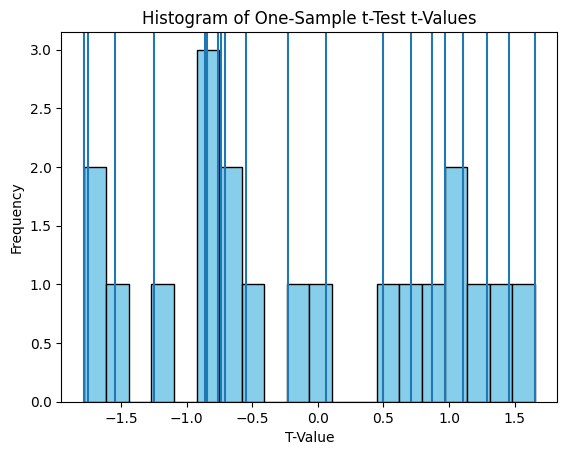

In [20]:
import matplotlib.pyplot as plt
plt.hist(tvalues, bins=20, color='skyblue', edgecolor='black')
for i in tvalues:
    plt.axvline(i)
plt.title('Histogram of One-Sample t-Test t-Values')
plt.xlabel('T-Value')
plt.ylabel('Frequency')
plt.show()

##### (b) If we control Type I error for each null hypothesis at level α = 0.05, then how many null hypotheses do we reject?

In [21]:
pvalues <= 0.05

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

* Reject none

##### (c) If we control the FWER at level 0.05, then how many null hypotheses do we reject?

In [24]:
from statsmodels.stats.multitest import multipletests
multipletests(pvalues, alpha=0.05, method='bonferroni')[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

* None

##### (d) If we control the FDR at level 0.05, then how many null hypotheses do we reject?

In [28]:
multipletests(pvalues, alpha=0.05, method='fdr_bh')[1] <= 0.05

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

* None

##### (e) Now suppose we “cherry-pick” the 10 fund managers who perform the best in our data. If we control the FWER for just these 10 fund managers at level 0.05, then how many null hypotheses do we reject? If we control the FDR for just these 10 fund managers at level 0.05, then how many null hypotheses do we reject?

In [81]:
means = {}
for i in range(X.shape[0]):
    means[i] = (X[i, :].mean())
sorted_means = dict(sorted(means.items(), key=lambda item: item[1], reverse=True)[:10])
top_10 = list(sorted_means.keys())

In [87]:
pvalues = np.zeros(10)
for i, col in enumerate(top_10):
    pvalues[i] = ttest_1samp(X[col, :], 0)[1]
pvalues

array([0.14790244, 0.1016307 , 0.19932695, 0.27281413, 0.33514154,
       0.38811279, 0.47940661, 0.62327727, 0.94960182, 0.82005165])

In [89]:
multipletests(pvalues, alpha=0.05, method='bonferroni')[0]

array([False, False, False, False, False, False, False, False, False,
       False])

In [93]:
multipletests(pvalues, method='fdr_bh')[1] <= 0.05

array([False, False, False, False, False, False, False, False, False,
       False])

Doesn't change answer

##### (f) Explain why the analysis in (e) is misleading. Hint: The standard approaches for controlling the FWER and FDR assume that all tested null hypotheses are adjusted for multiplicity, and that no “cherry-picking” of the smallest p-values has occurred. What goes wrong if we cherry-pick?

* By cherry picking we are ignoring the p-values of the other variables, and adding bias to our analysis